# King County Housing Price Predictions

###  Read in Data

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [2]:
df = pd.read_csv('kc_house_data_train.csv')

df.shape is used to describe the parameters of the DataFrame. df.info() is used to check Dtype. df.columns() allows one to see all the names of the columns, and df.drop is used to drop unneccessary columns. 

In [3]:
df.shape

(17290, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     17290 non-null  int64  
 1   id             17290 non-null  int64  
 2   date           17290 non-null  object 
 3   price          17290 non-null  float64
 4   bedrooms       17290 non-null  int64  
 5   bathrooms      17290 non-null  float64
 6   sqft_living    17290 non-null  int64  
 7   sqft_lot       17290 non-null  int64  
 8   floors         17290 non-null  float64
 9   waterfront     17290 non-null  int64  
 10  view           17290 non-null  int64  
 11  condition      17290 non-null  int64  
 12  grade          17290 non-null  int64  
 13  sqft_above     17290 non-null  int64  
 14  sqft_basement  17290 non-null  int64  
 15  yr_built       17290 non-null  int64  
 16  yr_renovated   17290 non-null  int64  
 17  zipcode        17290 non-null  int64  
 18  lat   

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0','date'], inplace = True)

# Exploratory Data Analysis

A correlation heat map is used to determine the correlation between all the columns in the DataFrame.

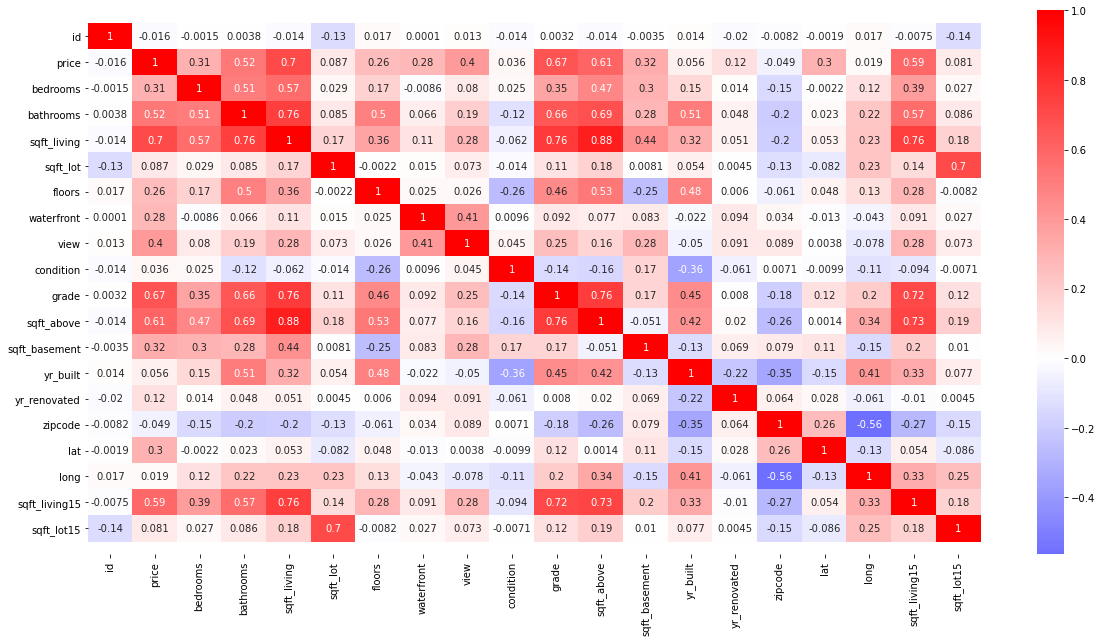

In [7]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

<ipython-input-8-9047fb8ded31>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_yticklabels(df['bathrooms'], fontsize = 17)
<ipython-input-8-9047fb8ded31>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][1].set_yticklabels(df['bedrooms'], fontsize = 17)
<ipython-input-8-9047fb8ded31>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_yticklabels(df['condition'], fontsize = 17)
<ipython-input-8-9047fb8ded31>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][1].set_yticklabels(df['floors'], fontsize = 17)
<ipython-input-8-9047fb8ded31>:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][0].set_yticklabels(df['grade'], fontsize = 17)
<ipython-input-8-9047fb8ded31>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][1].set_yticklabels(df['sqft_above

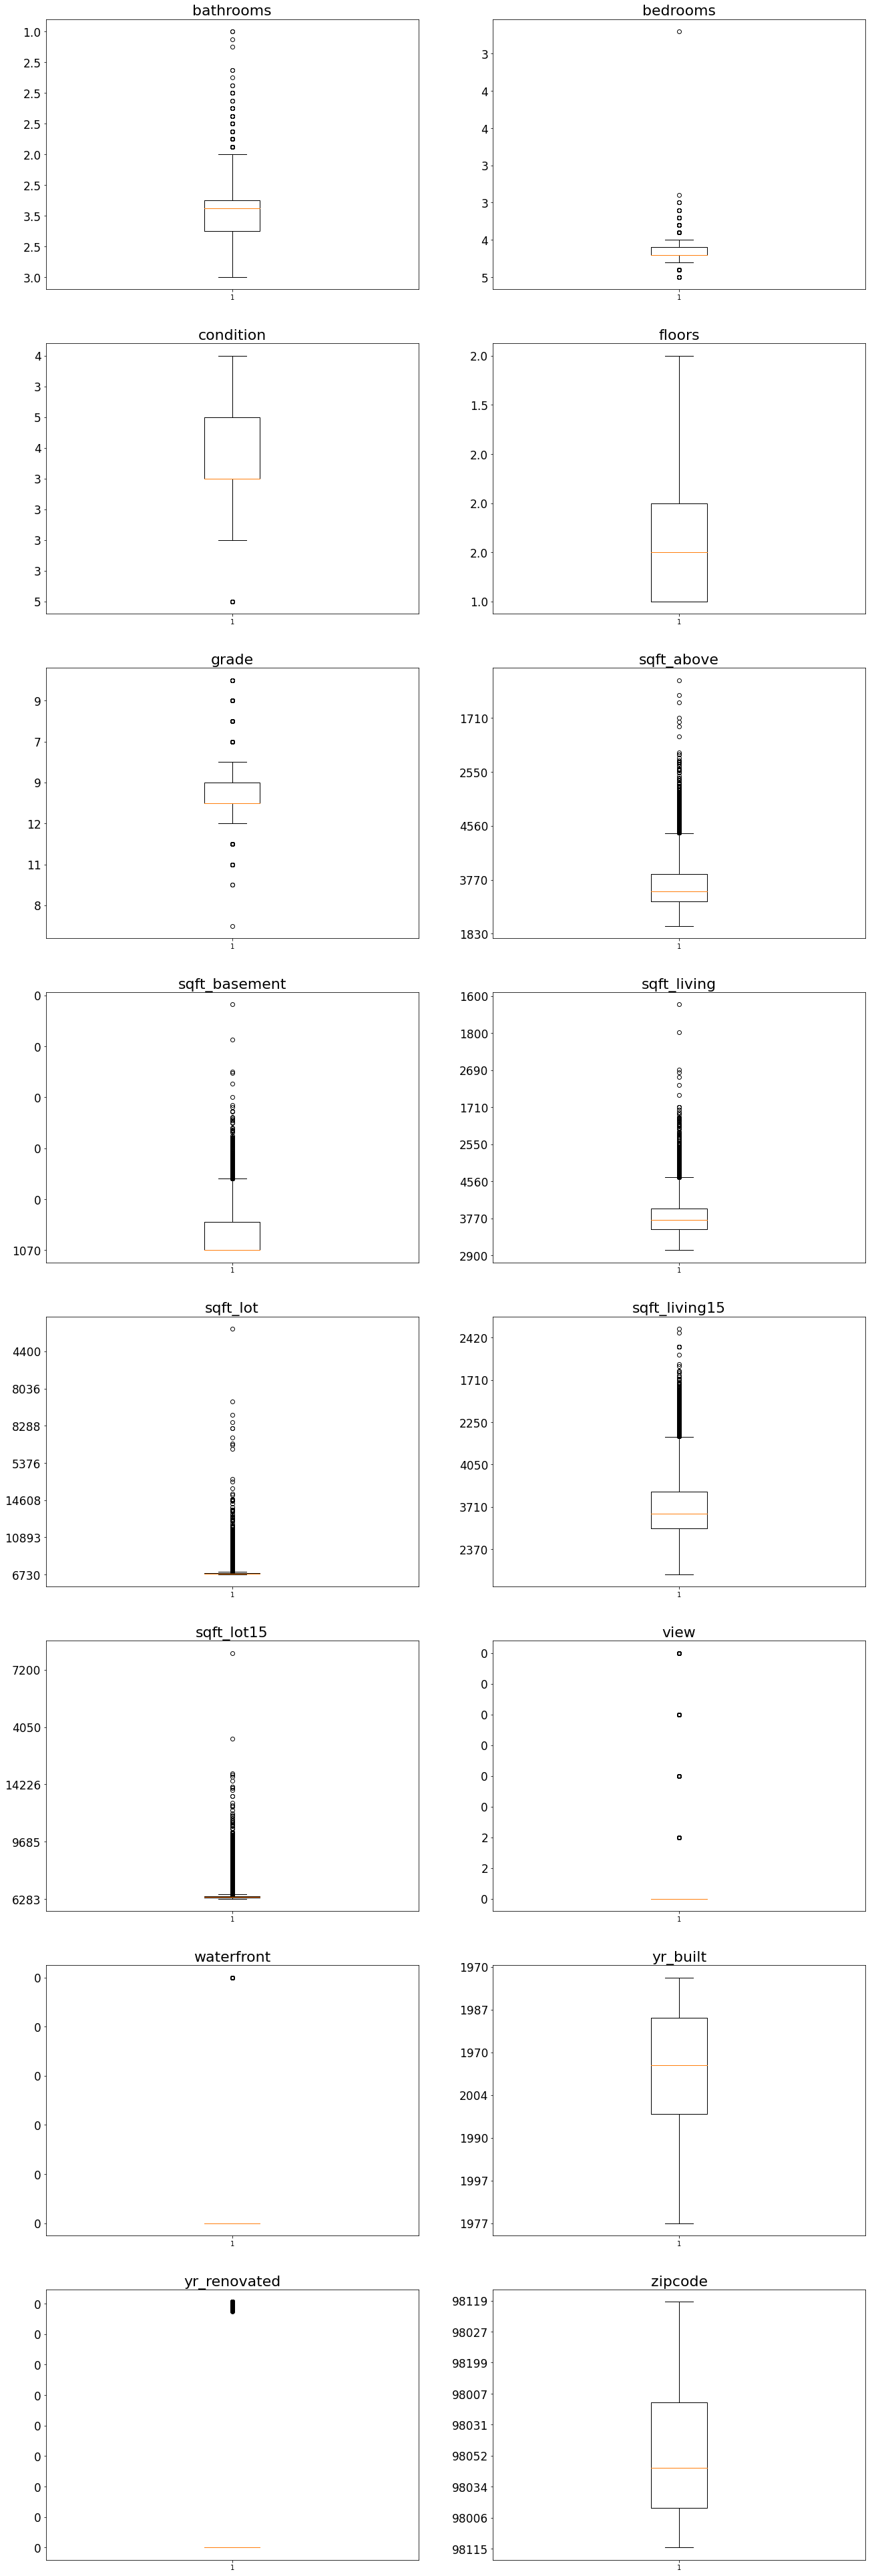

In [8]:
#boxplots of all the columns to determine outliers

fig , axes = plt.subplots(8,2, figsize = (22,70))

axes[0][0].set_title('bathrooms', fontsize = 22)
axes[0][1].set_title('bedrooms', fontsize = 22)
axes[1][0].set_title('condition', fontsize = 22)
axes[1][1].set_title('floors', fontsize = 22)
axes[2][0].set_title('grade', fontsize = 22)
axes[2][1].set_title('sqft_above', fontsize = 22)
axes[3][0].set_title('sqft_basement', fontsize = 22)
axes[3][1].set_title('sqft_living', fontsize = 22)
axes[4][0].set_title('sqft_lot', fontsize = 22)
axes[4][1].set_title('sqft_living15', fontsize = 22)
axes[5][0].set_title('sqft_lot15', fontsize = 22)
axes[5][1].set_title('view', fontsize = 22)
axes[6][0].set_title('waterfront', fontsize = 22)
axes[6][1].set_title('yr_built', fontsize = 22)
axes[7][0].set_title('yr_renovated', fontsize = 22)
axes[7][1].set_title('zipcode', fontsize = 22)

axes[0][0].boxplot(df['bathrooms'])
axes[0][1].boxplot(df['bedrooms'])
axes[1][0].boxplot(df['condition'])
axes[1][1].boxplot(df['floors'])
axes[2][0].boxplot(df['grade'])
axes[2][1].boxplot(df['sqft_above'])
axes[3][0].boxplot(df['sqft_basement'])
axes[3][1].boxplot(df['sqft_living'])
axes[4][0].boxplot(df['sqft_lot'])
axes[4][1].boxplot(df['sqft_living15'])
axes[5][0].boxplot(df['sqft_lot15'])
axes[5][1].boxplot(df['view'])
axes[6][0].boxplot(df['waterfront'])
axes[6][1].boxplot(df['yr_built'])
axes[7][0].boxplot(df['yr_renovated'])
axes[7][1].boxplot(df['zipcode'])

# axes[0][0].set_ytick()
axes[0][0].set_yticklabels(df['bathrooms'], fontsize = 17)
axes[0][1].set_yticklabels(df['bedrooms'], fontsize = 17)
axes[1][0].set_yticklabels(df['condition'], fontsize = 17)
axes[1][1].set_yticklabels(df['floors'], fontsize = 17)
axes[2][0].set_yticklabels(df['grade'], fontsize = 17)
axes[2][1].set_yticklabels(df['sqft_above'], fontsize = 17)
axes[3][0].set_yticklabels(df['sqft_basement'], fontsize = 17)
axes[3][1].set_yticklabels(df['sqft_living'], fontsize = 17)
axes[4][0].set_yticklabels(df['sqft_lot'], fontsize = 17)
axes[4][1].set_yticklabels(df['sqft_living15'], fontsize = 17)
axes[5][0].set_yticklabels(df['sqft_lot15'], fontsize = 17)
axes[5][1].set_yticklabels(df['view'], fontsize = 17)
axes[6][0].set_yticklabels(df['waterfront'], fontsize = 17)
axes[6][1].set_yticklabels(df['yr_built'], fontsize = 17)
axes[7][0].set_yticklabels(df['yr_renovated'], fontsize = 17)
axes[7][1].set_yticklabels(df['zipcode'], fontsize = 17)
                      
plt.subplots_adjust(hspace = .2)

plt.savefig('boxplots')

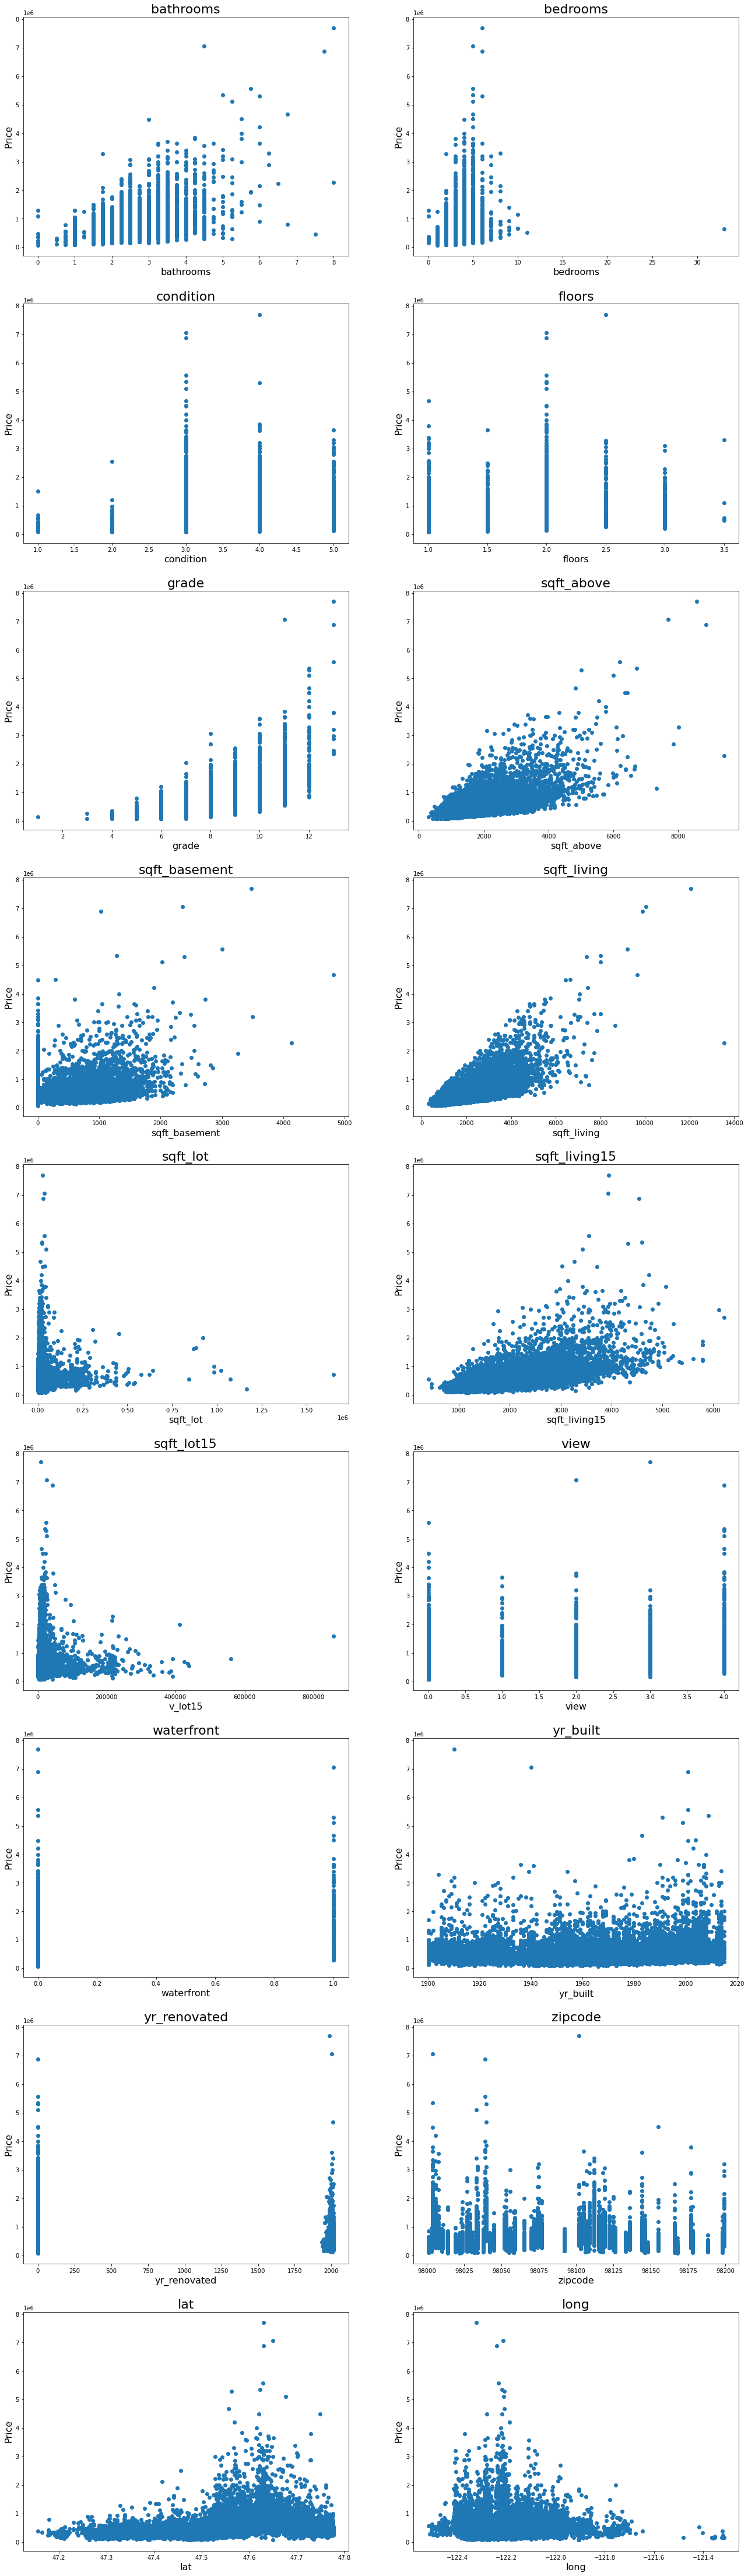

In [9]:
#scatter plot to see all the columns correlation with the price column

fig , axes = plt.subplots(9,2, figsize = (22,80))

axes[0][0].scatter(df['bathrooms'], df['price'])
axes[0][1].scatter(df['bedrooms'], df['price'])
axes[1][0].scatter(df['condition'], df['price'])
axes[1][1].scatter(df['floors'], df['price'])
axes[2][0].scatter(df['grade'], df['price'])
axes[2][1].scatter(df['sqft_above'], df['price'])
axes[3][0].scatter(df['sqft_basement'], df['price'])
axes[3][1].scatter(df['sqft_living'], df['price'])
axes[4][0].scatter(df['sqft_lot'], df['price'])
axes[4][1].scatter(df['sqft_living15'], df['price'])
axes[5][0].scatter(df['sqft_lot15'], df['price'])
axes[5][1].scatter(df['view'], df['price'])
axes[6][0].scatter(df['waterfront'], df['price'])
axes[6][1].scatter(df['yr_built'], df['price'])
axes[7][0].scatter(df['yr_renovated'], df['price'])
axes[7][1].scatter(df['zipcode'], df['price'])
axes[8][0].scatter(df['lat'], df['price'])
axes[8][1].scatter(df['long'], df['price'])
                      
plt.subplots_adjust(hspace = .2)

axes[0][0].set_title('bathrooms', fontsize = 22)
axes[0][1].set_title('bedrooms', fontsize = 22)
axes[1][0].set_title('condition', fontsize = 22)
axes[1][1].set_title('floors', fontsize = 22)
axes[2][0].set_title('grade', fontsize = 22)
axes[2][1].set_title('sqft_above', fontsize = 22)
axes[3][0].set_title('sqft_basement', fontsize = 22)
axes[3][1].set_title('sqft_living', fontsize = 22)
axes[4][0].set_title('sqft_lot', fontsize = 22)
axes[4][1].set_title('sqft_living15', fontsize = 22)
axes[5][0].set_title('sqft_lot15', fontsize = 22)
axes[5][1].set_title('view', fontsize = 22)
axes[6][0].set_title('waterfront', fontsize = 22)
axes[6][1].set_title('yr_built', fontsize = 22)
axes[7][0].set_title('yr_renovated', fontsize = 22)
axes[7][1].set_title('zipcode', fontsize = 22)
axes[8][0].set_title('lat', fontsize = 22)
axes[8][1].set_title('long', fontsize = 22)

axes[0][0].set_ylabel('Price', fontsize = 16)
axes[0][1].set_ylabel('Price', fontsize = 16)
axes[1][0].set_ylabel('Price', fontsize = 16)
axes[1][1].set_ylabel('Price', fontsize = 16)
axes[2][0].set_ylabel('Price', fontsize = 16)
axes[2][1].set_ylabel('Price', fontsize = 16)
axes[3][0].set_ylabel('Price', fontsize = 16)
axes[3][1].set_ylabel('Price', fontsize = 16)
axes[4][0].set_ylabel('Price', fontsize = 16)
axes[4][1].set_ylabel('Price', fontsize = 16)
axes[5][0].set_ylabel('Price', fontsize = 16)
axes[5][1].set_ylabel('Price', fontsize = 16)
axes[6][0].set_ylabel('Price', fontsize = 16)
axes[6][1].set_ylabel('Price', fontsize = 16)
axes[7][0].set_ylabel('Price', fontsize = 16)
axes[7][1].set_ylabel('Price', fontsize = 16)
axes[8][0].set_ylabel('Price', fontsize = 16)
axes[8][1].set_ylabel('Price', fontsize = 16)

axes[0][0].set_xlabel('bathrooms', fontsize = 16)
axes[0][1].set_xlabel('bedrooms', fontsize = 16)
axes[1][0].set_xlabel('condition', fontsize = 16)
axes[1][1].set_xlabel('floors', fontsize = 16)
axes[2][0].set_xlabel('grade', fontsize = 16)
axes[2][1].set_xlabel('sqft_above', fontsize = 16)
axes[3][0].set_xlabel('sqft_basement', fontsize = 16)
axes[3][1].set_xlabel('sqft_living', fontsize = 16)
axes[4][0].set_xlabel('sqft_lot', fontsize = 16)
axes[4][1].set_xlabel('sqft_living15', fontsize = 16)
axes[5][0].set_xlabel('v_lot15', fontsize = 16)
axes[5][1].set_xlabel('view', fontsize = 16)
axes[6][0].set_xlabel('waterfront', fontsize = 16)
axes[6][1].set_xlabel('yr_built', fontsize = 16)
axes[7][0].set_xlabel('yr_renovated', fontsize = 16)
axes[7][1].set_xlabel('zipcode', fontsize = 16)
axes[8][0].set_xlabel('lat', fontsize = 16)
axes[8][1].set_xlabel('long', fontsize = 16)

plt.savefig('scatter_plots')

From the boxplots one can determine -

From the scatter plots one can determine - 

### Cleaning Up Extreme Variables

In [10]:
#capping the house price at 5 standard deviations 
above_5std = df.price.mean()+(5*df.price.std())
above_5std
df = df[(df['price'])<= above_5std]

In [11]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,8819900270,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,3816300095,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,122069107,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


In [12]:
#replacing 0 bedrooms with the median amount of bedrooms because it's unlikely a house won't have bedrooms
#replacing 33 rooms with 3 and 11 rooms with 4 because of an input error
df['bedrooms'] = df['bedrooms'].replace([0,33,11],[df['bedrooms'].median(),3, 4])
df['bedrooms']

0        4.0
1        5.0
2        4.0
3        3.0
4        3.0
        ... 
17285    5.0
17286    2.0
17287    3.0
17288    3.0
17289    3.0
Name: bedrooms, Length: 17191, dtype: float64

# Feature Engineering

In [13]:
#feature 1
df['age'] = 2020 - df['yr_built']
df['age']

0        34
1        43
2        23
3        30
4        16
         ..
17285    62
17286    72
17287    67
17288    49
17289    68
Name: age, Length: 17191, dtype: int64

In [14]:
#feature 2 
df['renovation_age'] = np.where(df['yr_renovated']>0, 2020 - df['yr_renovated'], 0)
df[df['renovation_age'] != 0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovation_age
11,3971700580,385000.0,3.0,1.75,1930,14389,1.0,0,0,3,7,1130,800,1963,1998,98155,47.7733,-122.317,1730,14378,57,22
33,16000200,250000.0,3.0,2.25,1640,4420,2.0,0,0,4,7,1640,0,1918,1983,98002,47.3110,-122.210,1230,6632,102,37
67,7204200025,1225000.0,4.0,2.50,3120,49456,2.0,1,4,4,9,2590,530,1974,1989,98198,47.3535,-122.323,2030,32181,46,31
186,3603000410,174950.0,2.0,1.00,730,6000,1.0,0,0,3,6,730,0,1950,1985,98198,47.3832,-122.300,1750,7200,70,35
227,5315100737,900000.0,6.0,2.75,2300,24773,1.5,0,0,4,9,2300,0,1950,1985,98040,47.5833,-122.242,2720,11740,70,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17229,868000905,950000.0,3.0,2.50,3480,7800,1.0,0,0,4,7,1750,1730,1941,1998,98177,47.7047,-122.378,3010,9918,79,22
17235,1423069102,430000.0,3.0,2.50,2000,35438,2.0,0,0,3,7,2000,0,1968,2005,98027,47.4733,-121.994,2000,51836,52,15
17239,723049301,335000.0,2.0,1.75,1660,11437,2.0,0,0,3,7,1660,0,1958,1992,98146,47.4899,-122.339,1290,7860,62,28
17248,3586500770,808000.0,3.0,1.75,2590,32380,1.0,0,0,3,8,2590,0,1951,1994,98177,47.7539,-122.370,2340,28456,69,26


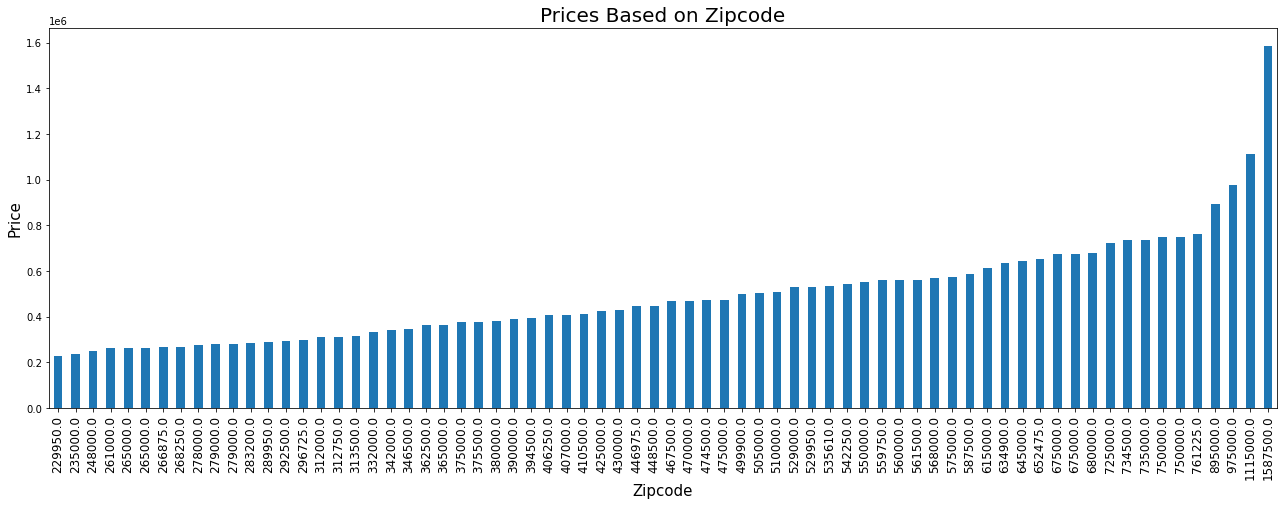

In [15]:
#feature 3 - Zipcodes has a curve resembling x^2. During the polynomial process squared columns are created. 
fig, ax = plt.subplots(figsize = (22,7))
zips = df.groupby(['zipcode'])['price'].median().sort_values(ascending=True)
zips.plot(kind='bar')
ax.set_title('Prices Based on Zipcode', fontsize = 20)
ax.set_xlabel('Zipcode', fontsize = 15)
ax.set_ylabel('Price', fontsize = 15)
ax.set_xticklabels(zips, fontsize = 12)

plt.savefig('zipcodes')

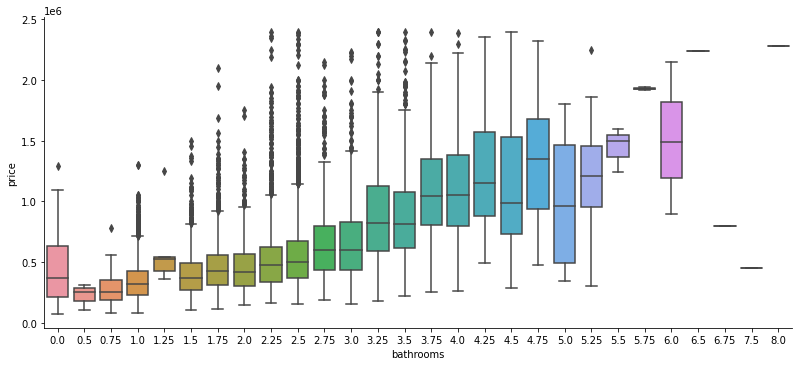

In [16]:
#feature 4 - Bathrooms has a curve resembling x^2. During the polynomial process squared columns are created. 
sns.catplot(x='bathrooms', y='price', kind='box', data=df, aspect = 2.2)

plt.savefig('bathrooms_box')

### Dummy Variables 

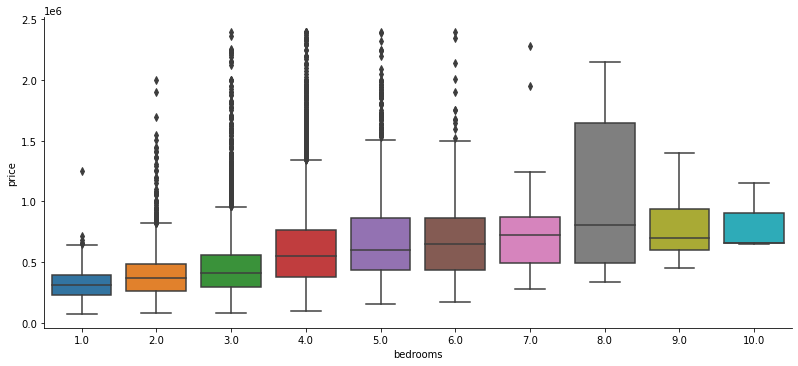

In [17]:
sns.catplot(x='bedrooms', y='price', kind='box', data=df, aspect = 2.2)
plt.savefig('bedrooms_dummies_box')

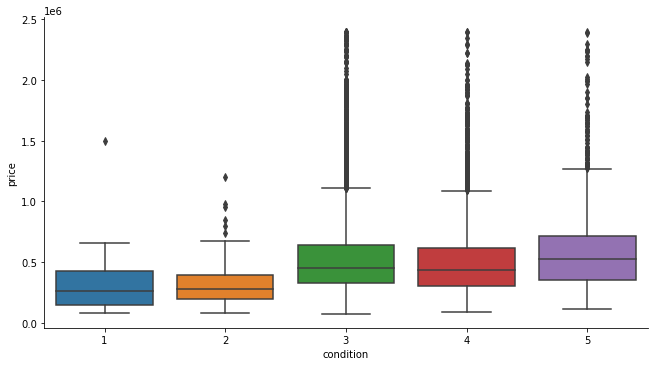

In [18]:
sns.catplot(x='condition', y='price', kind='box', data=df, aspect = 1.8)
plt.savefig('condition_dummies_box')

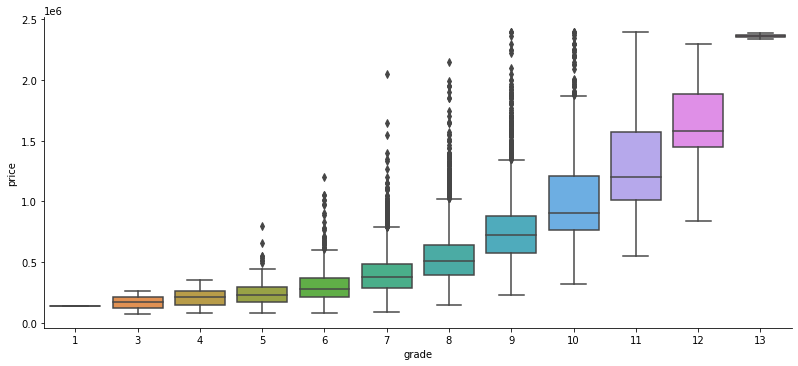

In [19]:
#grade resembles a curve, once it's incorporated in the polynomial grade will be made squared
sns.catplot(x='grade', y='price', kind='box', data=df, aspect = 2.2)
plt.savefig('grade_dummies_box')

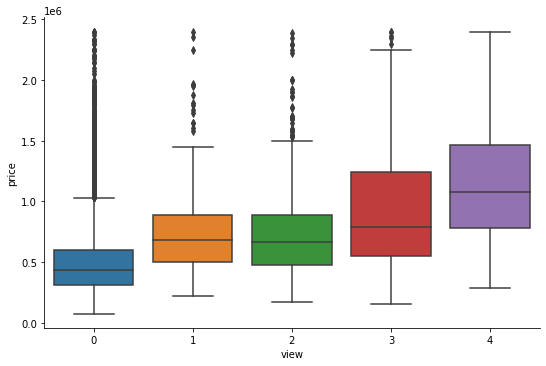

In [20]:
sns.catplot(x='view', y='price', kind='box', data=df, aspect = 1.5)
plt.savefig('view_dummies_box')

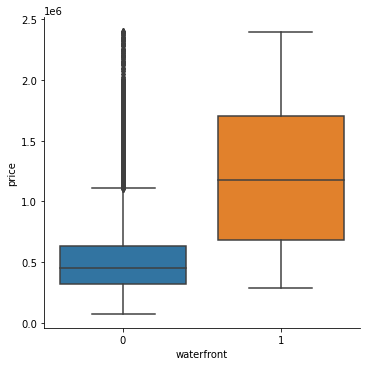

In [21]:
sns.catplot(x='waterfront', y='price', kind='box', data=df, aspect = 1)
plt.savefig('waterfront_dummies_box')

In [22]:
waterfront = df[df['waterfront'] == 1]
no_water = df[df['waterfront'] == 0]

# Statistical Tests

Null hypothesis: The price of a waterfront is the same as the price of no waterfront. 
Alternate hypothesis: The price of a place with a waterfront is not the same as the price of a place without a waterfront.

In [23]:
#two sample t-test
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
t, p_value = ttest_ind(waterfront['price'], no_water['price'], equal_var=True)
print(t)
print(p_value)

24.431056539090758
1.2886269368866712e-129


The p_value is extremely low. Since the p_value is lower than an alpha of 0.05 we can conclude that whether a house has a waterfront have a significant affect on the price.

Null hypothesis: The price of a waterfront is the same as the price of having no waterfront. 
Alternate hypothesis: The price of a place with a waterfront is not the same as the price of a place without a waterfront.

In [24]:
waterfront = df[df['waterfront'] == 1]
no_water = df[df['waterfront'] == 0]

In [25]:
#two sample t-test
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
t, p_value = ttest_ind(waterfront['price'], no_water['price'], equal_var=True)
print(t)
print(p_value)

24.431056539090758
1.2886269368866712e-129


The p_value is extremely low. Since the p_value is lower than an alpha of 0.05 we can conclude that whether a house has a waterfront has a significant affect on the price.

Null hypothesis: The price of a place with a basement is similiar to a place without a basement. 
Alternate hypothesis: The price of a place with a basement is not the same as the price of a place without a basement.

In [26]:
no_basement = df[df['sqft_basement'] == 0]
basement = df[df['sqft_basement'] != 0]

In [27]:
#two sample t-test
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
p_value = ttest_ind(no_basement['price'], basement['price'], equal_var=True)
print(p_value)

Ttest_indResult(statistic=-23.289545849380918, pvalue=3.797840901831922e-118)


The p value is so small we can reject the null hypothesis. 

In [28]:
#ANOVA
stats.f_oneway(df['price'][df['grade'] == 1],
              df['price'][df['grade'] == 3],
              df['price'][df['grade'] == 4],
              df['price'][df['grade'] == 5],
              df['price'][df['grade'] == 6],
              df['price'][df['grade'] == 7],
              df['price'][df['grade'] == 8],
              df['price'][df['grade'] == 9],
              df['price'][df['grade'] == 10],
              df['price'][df['grade'] == 11],
              df['price'][df['grade'] == 12],
              df['price'][df['grade'] == 13])

F_onewayResult(statistic=1528.7636329380962, pvalue=0.0)

In [29]:
#ANOVA
stats.f_oneway(df[df['bathrooms'] == 0]['price'],
              df[df['bathrooms'] == .5]['price'],
              df[df['bathrooms'] == .75]['price'],
              df[df['bathrooms'] == 1]['price'],
              df[df['bathrooms'] == 1.25]['price'],
              df[df['bathrooms'] == 1.5]['price'],
              df[df['bathrooms'] == 1.75]['price'],
              df[df['bathrooms'] == 2]['price'],
              df[df['bathrooms'] == 2.5]['price'],
              df[df['bathrooms'] == 2.75]['price'],
              df[df['bathrooms'] == 3]['price'],
              df[df['bathrooms'] == 3.25]['price'],
              df[df['bathrooms'] == 3.5]['price'],
              df[df['bathrooms'] == 3.75]['price'],
              df[df['bathrooms'] == 4]['price'],
              df[df['bathrooms'] == 4.25]['price'],
              df[df['bathrooms'] == 4.5]['price'],
              df[df['bathrooms'] == 4.75]['price'],
              df[df['bathrooms'] == 5]['price'],
              df[df['bathrooms'] == 5.25]['price'],
              df[df['bathrooms'] == 5.5]['price'],
              df[df['bathrooms'] == 5.75]['price'],
              df[df['bathrooms'] == 6]['price'],
              df[df['bathrooms'] == 6.25]['price'],
              df[df['bathrooms'] == 6.5]['price'],
              df[df['bathrooms'] == 6.75]['price'],
              df[df['bathrooms'] == 7.5]['price'],
              df[df['bathrooms'] == 7.75]['price'],
              df[df['bathrooms'] == 8]['price'])

C:\Users\berns\anaconda3\lib\site-packages\scipy\stats\stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [30]:
#ANOVA 
stats.f_oneway(df[df['bedrooms'] == 1]['price'],
              df[df['bedrooms'] == 2]['price'],
              df[df['bedrooms'] == 3]['price'],
              df[df['bedrooms'] == 4]['price'],
              df[df['bedrooms'] == 5]['price'],
              df[df['bedrooms'] == 6]['price'],
              df[df['bedrooms'] == 7]['price'],
              df[df['bedrooms'] == 8]['price'],
              df[df['bedrooms'] == 9]['price'],
              df[df['bedrooms'] == 10]['price'])

F_onewayResult(statistic=238.76931549240825, pvalue=0.0)

# Modeling

## Model 1 

For the first model x y and z were chosen bc ... 

In [87]:
target = df['price']

In [88]:
df_dummy = pd.get_dummies(df, columns=['condition', 'view', 'grade'], drop_first=True)

In [89]:
df_dummy.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'age', 'renovation_age', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'view_1', 'view_2', 'view_3', 'view_4', 'grade_3',
       'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13'],
      dtype='object')

In [90]:
features = ['sqft_living', 'sqft_lot', 'view_3', 'view_1', 'view_2', 'view_4', 'waterfront', 'condition_2', 'condition_3',
            'condition_4', 'condition_5', 'grade_4', 'grade_3', 'grade_5','grade_6', 'grade_7', 'grade_8', 'grade_9',
           'grade_10', 'grade_11', 'grade_12', 'grade_13', 'yr_renovated', 'age', 'sqft_basement', 'sqft_above']

In [91]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_dummy[features])
poly_data

array([[2.07000e+03, 8.89300e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 4.28490e+06],
       [2.90000e+03, 6.73000e+03, 0.00000e+00, ..., 1.14490e+06,
        1.95810e+06, 3.34890e+06],
       [3.77000e+03, 1.08930e+04, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.42129e+07],
       ...,
       [1.05000e+03, 9.87600e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.10250e+06],
       [1.90000e+03, 4.31860e+04, 0.00000e+00, ..., 3.60000e+05,
        7.80000e+05, 1.69000e+06],
       [1.33000e+03, 6.76800e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.76890e+06]])

In [92]:
poly_columns = poly.get_feature_names(features)

In [93]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [94]:
df_poly.head()

,sqft_living,sqft_lot,view_3,view_1,view_2,view_4,waterfront,condition_2,condition_3,condition_4,condition_5,grade_4,grade_3,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,yr_renovated,age,sqft_basement,sqft_above,sqft_living^2,sqft_living sqft_lot,sqft_living view_3,sqft_living view_1,sqft_living view_2,sqft_living view_4,sqft_living waterfront,sqft_living condition_2,sqft_living condition_3,sqft_living condition_4,sqft_living condition_5,sqft_living grade_4,sqft_living grade_3,sqft_living grade_5,sqft_living grade_6,sqft_living grade_7,sqft_living grade_8,sqft_living grade_9,sqft_living grade_10,sqft_living grade_11,sqft_living grade_12,sqft_living grade_13,sqft_living yr_renovated,sqft_living age,...,grade_8 grade_13,grade_8 yr_renovated,grade_8 age,grade_8 sqft_basement,grade_8 sqft_above,grade_9^2,grade_9 grade_10,grade_9 grade_11,grade_9 grade_12,grade_9 grade_13,grade_9 yr_renovated,grade_9 age,grade_9 sqft_basement,grade_9 sqft_above,grade_10^2,grade_10 grade_11,grade_10 grade_12,grade_10 grade_13,grade_10 yr_renovated,grade_10 age,grade_10 sqft_basement,grade_10 sqft_above,grade_11^2,grade_11 grade_12,grade_11 grade_13,grade_11 yr_renovated,grade_11 age,grade_11 sqft_basement,grade_11 sqft_above,grade_12^2,grade_12 grade_13,grade_12 yr_renovated,grade_12 age,grade_12 sqft_basement,grade_12 sqft_above,grade_13^2,grade_13 yr_renovated,grade_13 age,grade_13 sqft_basement,grade_13 sqft_above,yr_renovated^2,yr_renovated age,yr_renovated sqft_basement,yr_renovated sqft_above,age^2,age sqft_basement,age sqft_above,sqft_basement^2,sqft_basement sqft_above,sqft_above^2
0,2070.0,8893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,2070.0,4284900.0,18408510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,70380.0,...,0.0,0.0,34.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1156.0,0.0,70380.0,0.0,0.0,4284900.0
1,2900.0,6730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1070.0,1830.0,8410000.0,19517000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,0.0,124700.0,...,0.0,0.0,43.0,1070.0,1830.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1849.0,46010.0,78690.0,1144900.0,1958100.0,3348900.0
2,3770.0,10893.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,3770.0,14212900.0,41066610.0,0.0,0.0,3770.0,0.0,0.0,0.0,3770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3770.0,0.0,0.0,0.0,86710.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,3770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0,0.0,86710.0,0.0,0.0,14212900.0
3,4560.0,14608.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,0.0,4560.0,20793600.0,66612480.0,0.0,0.0,4560.0,0.0,0.0,0.0,4560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4560.0,0.0,0.0,136800.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,0.0,4560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,900.0,0.0,136800.0,0.0,0.0,20793600.0
4,2550.0,5376.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2550.0,6502500.0,13708800.0,0.0,0.0,0.0,0.0,0.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,40800.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,0.0,40800.0,0.0,0.0,6502500.0


In [95]:
#before
df.shape

(17191, 22)

In [96]:
#after feature
df_poly.shape

(17191, 377)

In [97]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13752, 377) Target:  (13752,)
Test set - Features:  (3439, 377) Target:  (3439,)


In [98]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

898512.2936500628
[ 1.26710740e+02 -2.26284821e+01 -3.56802638e+04  5.28316602e+04
  5.53613599e+04  1.58273812e+05  1.51435825e+05 -3.25016791e+05
 -1.81233911e+05 -2.16490646e+05 -1.11148097e+05  9.41560211e+04
  1.61548292e+00 -5.35426303e+04 -7.14045149e+04 -2.15783227e+05
  1.50059798e+04 -1.70502785e+05 -2.65892015e+04  1.86567467e+05
  2.42093992e+05  1.06133750e-02 -4.04159418e+02 -7.69358198e+03
  9.92882670e+01  2.71523895e+01 -7.86421206e-03  8.33876706e-02
  8.37644964e+00 -1.75765278e+01 -1.55313669e+01 -2.82913529e+01
  1.24137825e+02  4.80570481e+01 -3.66376037e+01 -2.26869645e+01
  1.88854817e-02  1.62185884e+02  1.69921473e-01 -4.01017389e+01
 -6.50214840e+01 -3.63129714e+01 -3.04150959e+01  2.57583327e+01
  8.87558339e+00 -1.99454555e+01  4.95294861e+01  7.55134283e+01
  1.89620100e-02  1.11239496e-01 -4.13275365e-03  6.78702543e-03
  4.88914338e-07 -1.13337997e-01  7.66407246e-01 -2.03632110e-01
  1.16054271e-01 -9.26722752e+00  1.07820478e+00  1.19074857e+00
  8.064

In [99]:
y_pred = lm.predict(X_test)
y_pred_train = lm.predict(X_train)
print ("Score:", lm.score(X_test, y_test))
print ("Score:", lm.score(X_train, y_train))

Score: 0.6382927382029164
Score: 0.6938840595832045


In [100]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:126374.52460044649
Mean Squared Error:34447133179.96749
Root Mean Squared Error:185599.38895364793


In [101]:
price_std = target.std()
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.4145918717354018
Root Mean Squared Error Z: 0.6088885264061193


In [102]:
train_mae = metrics.mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_pred_train)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_pred_train)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))

Mean Absolute Error:119611.94729091642
Mean Squared Error:28259172496.5637
Root Mean Squared Error:168104.64745676634


These are not overfitting because the RMSE of the train and test are fairly similar.

In [103]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=200)

selector.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=200, score_func=<function f_regression at 0x000001B49F3E1E50>)

In [104]:
selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [105]:
selected_columns
removed_columns

Index(['condition_3', 'condition_4', 'grade_4', 'grade_3', 'grade_8',
       'sqft_living condition_2', 'sqft_living grade_4', 'sqft_living grade_3',
       'sqft_lot^2', 'sqft_lot view_3',
       ...
       'grade_9 grade_13', 'grade_10 grade_11', 'grade_10 grade_12',
       'grade_10 grade_13', 'grade_11 grade_12', 'grade_11 grade_13',
       'grade_12 grade_13', 'grade_12 yr_renovated', 'grade_13 yr_renovated',
       'age^2'],
      dtype='object', length=177)

## Model 2 Based Off Model 1 

In [106]:
#only want to use the previous selected columns
df_poly[selected_columns]

,sqft_living,sqft_lot,view_3,view_1,view_2,view_4,waterfront,condition_2,condition_5,grade_5,grade_6,grade_7,grade_9,grade_10,grade_11,grade_12,grade_13,yr_renovated,age,sqft_basement,sqft_above,sqft_living^2,sqft_living sqft_lot,sqft_living view_3,sqft_living view_1,sqft_living view_2,sqft_living view_4,sqft_living waterfront,sqft_living condition_3,sqft_living condition_4,sqft_living condition_5,sqft_living grade_5,sqft_living grade_6,sqft_living grade_7,sqft_living grade_8,sqft_living grade_9,sqft_living grade_10,sqft_living grade_11,sqft_living grade_12,sqft_living grade_13,sqft_living yr_renovated,sqft_living age,sqft_living sqft_basement,sqft_living sqft_above,sqft_lot view_1,sqft_lot view_2,sqft_lot view_4,sqft_lot waterfront,sqft_lot condition_3,sqft_lot grade_7,...,condition_5 grade_11,condition_5 age,condition_5 sqft_basement,condition_5 sqft_above,grade_5^2,grade_5 age,grade_5 sqft_above,grade_6^2,grade_6 age,grade_6 sqft_basement,grade_6 sqft_above,grade_7^2,grade_7 age,grade_7 sqft_basement,grade_7 sqft_above,grade_8 yr_renovated,grade_8 age,grade_8 sqft_basement,grade_9^2,grade_9 yr_renovated,grade_9 age,grade_9 sqft_basement,grade_9 sqft_above,grade_10^2,grade_10 yr_renovated,grade_10 age,grade_10 sqft_basement,grade_10 sqft_above,grade_11^2,grade_11 yr_renovated,grade_11 age,grade_11 sqft_basement,grade_11 sqft_above,grade_12^2,grade_12 age,grade_12 sqft_basement,grade_12 sqft_above,grade_13^2,grade_13 age,grade_13 sqft_basement,grade_13 sqft_above,yr_renovated^2,yr_renovated age,yr_renovated sqft_basement,yr_renovated sqft_above,age sqft_basement,age sqft_above,sqft_basement^2,sqft_basement sqft_above,sqft_above^2
0,2070.0,8893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,2070.0,4284900.0,18408510.0,0.0,0.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,2070.0,0.0,0.0,0.0,0.0,0.0,0.0,70380.0,0.0,4284900.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70380.0,0.0,0.0,4284900.0
1,2900.0,6730.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1070.0,1830.0,8410000.0,19517000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,0.0,0.0,2900.0,0.0,0.0,0.0,0.0,0.0,0.0,124700.0,3103000.0,5307000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,43.0,1070.0,1830.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0,1070.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46010.0,78690.0,1144900.0,1958100.0,3348900.0
2,3770.0,10893.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23.0,0.0,3770.0,14212900.0,41066610.0,0.0,0.0,3770.0,0.0,0.0,3770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3770.0,0.0,0.0,0.0,86710.0,0.0,14212900.0,0.0,10893.0,0.0,0.0,10893.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.0,0.0,3770.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86710.0,0.0,0.0,14212900.0
3,4560.0,14608.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30.0,0.0,4560.0,20793600.0,66612480.0,0.0,0.0,4560.0,0.0,0.0,4560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4560.0,0.0,0.0,136800.0,0.0,20793600.0,0.0,14608.0,0.0,0.0,14608.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0,4560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136800.0,0.0,0.0,20793600.0
4,2550.0,5376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,2550.0,6502500.0,13708800.0,0.0,0.0,0.0,0.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,40800.0,0.0,6502500.0,0.0,0.0,0.0,0.0,5376.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16.0,0.0,2550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40800.0

In [107]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly[selected_columns], target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13752, 200) Target:  (13752,)
Test set - Features:  (3439, 200) Target:  (3439,)


In [108]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

306542.162899599
[ 2.15440873e+02  3.35360032e-02 -1.05717684e+05  2.49305391e+04
  7.09042851e+04  2.31949984e+05  2.69871961e+05 -5.10254773e+04
  7.82523621e+03 -1.07293971e+05 -1.32183226e+05 -1.47098558e+05
 -2.10099837e+05  5.04215578e+04  2.76626255e+05  8.29803736e+05
 -1.81308915e-02 -8.08757957e+02 -1.67468057e+03  2.93738298e+02
 -7.83093096e+01 -2.66401548e-02  4.80986482e-01  8.41453012e+00
 -1.26510853e+00 -1.27978887e+01 -2.37855089e+01  1.30850242e+02
 -3.04164569e+01 -1.37816617e+01  8.23351333e+00 -3.81233180e+02
 -1.61048767e+02 -1.37008372e+02 -4.86090787e+01 -7.89458825e+01
 -9.80463587e+01 -1.32658055e+02 -8.57437204e+01  2.42113035e+01
  1.61869587e-02  8.89977754e-02  1.52341537e-02  3.62192669e-03
  7.15721401e-01 -2.47961805e-01  1.35708504e-01 -9.37065419e+00
  2.18332170e-01  1.04456742e-01 -4.92329607e-01 -6.63411148e-01
  1.03114209e-01  3.44785019e-01  3.77481408e+01 -4.81476469e-01
 -4.80988343e-01 -1.05717738e+05 -3.48720039e+05  1.73302036e+05
  1.7295

In [109]:
y_pred = lm.predict(X_test)
y_pred

array([ 868038.56825024, 1267245.64390607,  723530.76300801, ...,
        705940.6647858 ,  508015.95660854,  485019.29049481])

In [110]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.637736848544139


In [111]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


# print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
# print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Squared Error:185741.95337252636


In [112]:
y_train_pred = lm.predict(X_train)
y_train_pred

array([ 241090.72661324,  496732.86398656,  704396.22959927, ...,
        360347.86492053,  252021.8814121 , 1115757.97707665])

In [125]:
print ("Score:", lm.score(X_train, y_train))

Score: 0.6779386787043762


In [113]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))

Mean Absolute Error:121074.94618094672
Mean Squared Error:28909642202.513554
Root Mean Squared Error:170028.3570540913


The follow up model is similiar to the original model.

## Model 3 - NO feature engineering used

In [114]:
features_orig = ['sqft_living', 'sqft_lot', 'view', 'waterfront', 'condition', 'grade', 'yr_renovated',
            'yr_built', 'sqft_basement', 'sqft_above']

In [115]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df[features_orig])
poly_data

array([[2.07000e+03, 8.89300e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 4.28490e+06],
       [2.90000e+03, 6.73000e+03, 0.00000e+00, ..., 1.14490e+06,
        1.95810e+06, 3.34890e+06],
       [3.77000e+03, 1.08930e+04, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.42129e+07],
       ...,
       [1.05000e+03, 9.87600e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.10250e+06],
       [1.90000e+03, 4.31860e+04, 0.00000e+00, ..., 3.60000e+05,
        7.80000e+05, 1.69000e+06],
       [1.33000e+03, 6.76800e+03, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.76890e+06]])

In [116]:
target = df['price']

In [117]:
poly_columns_orig = poly.get_feature_names(features_orig)

In [118]:
df_poly_orig = pd.DataFrame(poly_data, columns=poly_columns_orig)

In [119]:
df_poly_orig.head()

,sqft_living,sqft_lot,view,waterfront,condition,grade,yr_renovated,yr_built,sqft_basement,sqft_above,sqft_living^2,sqft_living sqft_lot,sqft_living view,sqft_living waterfront,sqft_living condition,sqft_living grade,sqft_living yr_renovated,sqft_living yr_built,sqft_living sqft_basement,sqft_living sqft_above,sqft_lot^2,sqft_lot view,sqft_lot waterfront,sqft_lot condition,sqft_lot grade,sqft_lot yr_renovated,sqft_lot yr_built,sqft_lot sqft_basement,sqft_lot sqft_above,view^2,view waterfront,view condition,view grade,view yr_renovated,view yr_built,view sqft_basement,view sqft_above,waterfront^2,waterfront condition,waterfront grade,waterfront yr_renovated,waterfront yr_built,waterfront sqft_basement,waterfront sqft_above,condition^2,condition grade,condition yr_renovated,condition yr_built,condition sqft_basement,condition sqft_above,grade^2,grade yr_renovated,grade yr_built,grade sqft_basement,grade sqft_above,yr_renovated^2,yr_renovated yr_built,yr_renovated sqft_basement,yr_renovated sqft_above,yr_built^2,yr_built sqft_basement,yr_built sqft_above,sqft_basement^2,sqft_basement sqft_above,sqft_above^2
0,2070.0,8893.0,0.0,0.0,4.0,8.0,0.0,1986.0,0.0,2070.0,4284900.0,18408510.0,0.0,0.0,8280.0,16560.0,0.0,4111020.0,0.0,4284900.0,79085449.0,0.0,0.0,35572.0,71144.0,0.0,17661498.0,0.0,18408510.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,32.0,0.0,7944.0,0.0,8280.0,64.0,0.0,15888.0,0.0,16560.0,0.0,0.0,0.0,0.0,3944196.0,0.0,4111020.0,0.0,0.0,4284900.0
1,2900.0,6730.0,0.0,0.0,5.0,8.0,0.0,1977.0,1070.0,1830.0,8410000.0,19517000.0,0.0,0.0,14500.0,23200.0,0.0,5733300.0,3103000.0,5307000.0,45292900.0,0.0,0.0,33650.0,53840.0,0.0,13305210.0,7201100.0,12315900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,40.0,0.0,9885.0,5350.0,9150.0,64.0,0.0,15816.0,8560.0,14640.0,0.0,0.0,0.0,0.0,3908529.0,2115390.0,3617910.0,1144900.0,1958100.0,3348900.0
2,3770.0,10893.0,2.0,0.0,3.0,11.0,0.0,1997.0,0.0,3770.0,14212900.0,41066610.0,7540.0,0.0,11310.0,41470.0,0.0,7528690.0,0.0,14212900.0,118657449.0,21786.0,0.0,32679.0,119823.0,0.0,21753321.0,0.0,41066610.0,4.0,0.0,6.0,22.0,0.0,3994.0,0.0,7540.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,33.0,0.0,5991.0,0.0,11310.0,121.0,0.0,21967.0,0.0,41470.0,0.0,0.0,0.0,0.0,3988009.0,0.0,7528690.0,0.0,0.0,14212900.0
3,4560.0,14608.0,2.0,0.0,3.0,12.0,0.0,1990.0,0.0,4560.0,20793600.0,66612480.0,9120.0,0.0,13680.0,54720.0,0.0,9074400.0,0.0,20793600.0,213393664.0,29216.0,0.0,43824.0,175296.0,0.0,29069920.0,0.0,66612480.0,4.0,0.0,6.0,24.0,0.0,3980.0,0.0,9120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,36.0,0.0,5970.0,0.0,13680.0,144.0,0.0,23880.0,0.0,54720.0,0.0,0.0,0.0,0.0,3960100.0,0.0,9074400.0,0.0,0.0,20793600.0
4,2550.0,5376.0,0.0,0.0,3.0,9.0,0.0,2004.0,0.0,2550.0,6502500.0,13708800.0,0.0,0.0,7650.0,22950.0,0.0,5110200.0,0.0,6502500.0,28901376.0,0.0,0.0,16128.0,48384.0,0.0,10773504.0,0.0,13708800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,27.0,0.0,6012.0,0.0,7650.0,81.0,0.0,18036.0,0.0,22950.0,0.0,0.0,0.0,0.0,4016016.0,0.0,5110200.0,0.0,0.0,6502500.0


In [120]:
df_poly_orig.shape

(17191, 65)

In [121]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly_orig, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13752, 65) Target:  (13752,)
Test set - Features:  (3439, 65) Target:  (3439,)


In [122]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

119819081.76476638
[-1.27513617e+07 -1.12923348e+01 -2.00743674e+05 -3.49675118e+06
  5.47842856e+05  1.18719426e+06 -2.94469638e+03 -1.25623197e+05
  1.27509485e+07  1.27517209e+07 -1.68317752e-02 -2.40028665e+00
 -6.01622180e+00  9.92557571e+01  1.96438228e+01  1.85015978e+01
 -5.68053460e-01 -8.56172862e-02  1.51409984e-01 -2.44824823e-01
  6.08484697e-07 -6.84185402e-02 -7.85719086e+00 -2.50776660e-01
 -1.02090528e-01  1.08656241e-06  6.47587085e-03  2.39999852e+00
  2.40024162e+00 -4.05865569e+02  1.53654385e+04  1.23809377e+04
  4.10723081e+03  3.67835895e+00  9.48607306e+01 -8.50722283e-01
 -5.12420783e+00 -3.49675345e+06 -1.74787063e+04 -5.49042610e+04
 -4.38933156e+01  3.86236234e+03  3.35794509e+01  6.47040844e+01
  3.26168002e+03  5.40177159e+03 -1.66504332e+01 -3.26367189e+02
  1.11539987e+01  9.41950948e+00  1.02070754e+04  5.33980476e+00
 -6.53018733e+02  1.66863695e+01  1.90975420e+00  2.62155237e-01
  1.23680917e+00  6.20530644e-01  5.90402908e-01  3.30340220e+01
  1.92

In [123]:
y_pred = lm.predict(X_test)
y_pred

array([ 854429.87013774, 1346825.39552726,  694751.54831345, ...,
        686529.03494404,  597356.94915594,  507434.82596643])

In [124]:
y_train_pred = lm.predict(X_train)
y_train_pred

array([ 218780.05289327,  530522.25479345,  693745.72112523, ...,
        348093.70725501,  315832.22577684, 1020320.78717296])

In [126]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.6465848937261289


In [127]:
print ("Score:", lm.score(X_train, y_train))

Score: 0.6779386787043762


In [130]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:125731.51565578383
Mean Squared Error:33657431076.012096
Root Mean Squared Error:183459.6170169667


In [128]:
price_std = target.std()
print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.42021177950907473
Root Mean Squared Error Z: 0.6093562318194735


In [129]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))

Mean Absolute Error:121798.30952583264
Mean Squared Error:29731174471.25568
Root Mean Squared Error:172427.30198914465


The test model and train model are similiar so it can be assumed it's NOT overfit. 

## Model 4

According to the heat map I'm keeping sqft_living because is has a .7 correlation with price, grade because it has a .67 corr, bathrooms bc the correlation is .52 and everyone needs bathrooms, and view has .4 corr

In [131]:
features = ['sqft_lot', 'view_1', 'view_2', 'view_3', 'view_4','grade_3','grade_4', 'grade_5','grade_6', 'grade_7', 
            'grade_8', 'grade_9','grade_10', 'grade_11', 'grade_12', 'grade_13', 'age', 'bathrooms']

In [132]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

In [133]:
poly_data = poly.fit_transform(df_dummy[features])

In [134]:
poly_data

array([[8.8930e+03, 0.0000e+00, 0.0000e+00, ..., 1.1560e+03, 7.6500e+01,
        5.0625e+00],
       [6.7300e+03, 0.0000e+00, 0.0000e+00, ..., 1.8490e+03, 1.2900e+02,
        9.0000e+00],
       [1.0893e+04, 0.0000e+00, 1.0000e+00, ..., 5.2900e+02, 5.7500e+01,
        6.2500e+00],
       ...,
       [9.8760e+03, 0.0000e+00, 0.0000e+00, ..., 4.4890e+03, 6.7000e+01,
        1.0000e+00],
       [4.3186e+04, 0.0000e+00, 0.0000e+00, ..., 2.4010e+03, 7.3500e+01,
        2.2500e+00],
       [6.7680e+03, 0.0000e+00, 0.0000e+00, ..., 4.6240e+03, 1.0200e+02,
        2.2500e+00]])

In [135]:
poly_columns = poly.get_feature_names(features)

In [136]:
df_poly = pd.DataFrame(poly_data, columns=poly_columns)

In [137]:
df_poly.head()

,sqft_lot,view_1,view_2,view_3,view_4,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,age,bathrooms,sqft_lot^2,sqft_lot view_1,sqft_lot view_2,sqft_lot view_3,sqft_lot view_4,sqft_lot grade_3,sqft_lot grade_4,sqft_lot grade_5,sqft_lot grade_6,sqft_lot grade_7,sqft_lot grade_8,sqft_lot grade_9,sqft_lot grade_10,sqft_lot grade_11,sqft_lot grade_12,sqft_lot grade_13,sqft_lot age,sqft_lot bathrooms,view_1^2,view_1 view_2,view_1 view_3,view_1 view_4,view_1 grade_3,view_1 grade_4,view_1 grade_5,view_1 grade_6,view_1 grade_7,view_1 grade_8,view_1 grade_9,view_1 grade_10,view_1 grade_11,view_1 grade_12,...,grade_6 grade_11,grade_6 grade_12,grade_6 grade_13,grade_6 age,grade_6 bathrooms,grade_7^2,grade_7 grade_8,grade_7 grade_9,grade_7 grade_10,grade_7 grade_11,grade_7 grade_12,grade_7 grade_13,grade_7 age,grade_7 bathrooms,grade_8^2,grade_8 grade_9,grade_8 grade_10,grade_8 grade_11,grade_8 grade_12,grade_8 grade_13,grade_8 age,grade_8 bathrooms,grade_9^2,grade_9 grade_10,grade_9 grade_11,grade_9 grade_12,grade_9 grade_13,grade_9 age,grade_9 bathrooms,grade_10^2,grade_10 grade_11,grade_10 grade_12,grade_10 grade_13,grade_10 age,grade_10 bathrooms,grade_11^2,grade_11 grade_12,grade_11 grade_13,grade_11 age,grade_11 bathrooms,grade_12^2,grade_12 grade_13,grade_12 age,grade_12 bathrooms,grade_13^2,grade_13 age,grade_13 bathrooms,age^2,age bathrooms,bathrooms^2
0,8893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,2.25,79085449.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8893.0,0.0,0.0,0.0,0.0,0.0,302362.0,20009.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1156.0,76.5,5.0625
1,6730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,43.0,3.00,45292900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6730.0,0.0,0.0,0.0,0.0,0.0,289390.0,20190.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,43.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1849.0,129.0,9.0000
2,10893.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,2.50,118657449.0,0.0,10893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10893.0,0.0,0.0,250539.0,27232.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,529.0,57.5,6.2500
3,14608.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,3.50,213393664.0,0.0,14608.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14608.0,0.0,438240.0,51128.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,3.5,0.0,0.0,0.0,900.0,105.0,12.2500
4,5376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,2.50,28901376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5376.0,0.0,0.0,0.0,0.0,86016.0,13440.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.0,16.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,40.0,6.2500


In [138]:
df_poly.shape

(17191, 189)

In [139]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13752, 189) Target:  (13752,)
Test set - Features:  (3439, 189) Target:  (3439,)


In [140]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

333773.3717145935
[-3.93208921e+01  4.06505585e+04  9.05520503e+04  2.76917465e+04
  2.16332870e+05  4.61468402e-04  4.25167987e+04 -4.63884719e+04
 -7.74476565e+04 -1.11732783e+05 -8.21907647e+04 -1.18175145e+05
 -9.57460452e+04  1.25850934e+05  3.55904872e+05  7.40828960e+03
  9.99927220e+03  1.39080514e+05  1.45650120e-07  5.43076223e-01
 -3.67516722e-01 -2.19431720e-01 -1.37918956e+00  1.99695183e+01
  3.88428065e+01  4.02474260e+01  4.03782215e+01  3.99968467e+01
  3.97202529e+01  3.93266204e+01  3.89476497e+01  3.96015114e+01
  3.99926904e+01 -1.01425558e+01 -9.87166860e-03  4.73872696e-02
  4.06513139e+04  1.60071068e-10  3.36513040e-10 -1.07684173e-09
 -2.28465069e-09 -1.56108412e+05 -2.61905302e+04 -1.26626849e+05
 -4.74629648e+04  2.59183094e+04 -3.65067162e+04  1.49452526e+05
  2.58175950e+05 -4.36557457e-11 -2.61934474e-10  9.90456152e+02
 -8.14972444e+03  9.05520505e+04 -8.73114914e-11  2.32830644e-10
 -1.43359102e-10  4.05864586e+04  5.68871676e+04 -4.19832494e+04
 -4.711

In [142]:
y_pred = lm.predict(X_test)
print ("Score:", lm.score(X_test, y_test))

Score: 0.6288830369014877


In [143]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Squared Error:187998.04407820172


In [145]:
y_train_prediction = lm.predict(X_train)

In [146]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))))

Root Mean Squared Error:180311.19164289645


Still not overfitting because the train and test are similiar.

## Model 5 based off Model 4 

In [157]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=100)

selector.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=100, score_func=<function f_regression at 0x000001B49F3E1E50>)

In [158]:
selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [159]:
df_poly[selected_columns]

,sqft_lot,view_1,view_2,view_3,view_4,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,age,bathrooms,sqft_lot^2,sqft_lot view_1,sqft_lot view_2,sqft_lot view_3,sqft_lot view_4,sqft_lot grade_5,sqft_lot grade_6,sqft_lot grade_7,sqft_lot grade_8,sqft_lot grade_9,sqft_lot grade_10,sqft_lot grade_11,sqft_lot grade_12,sqft_lot grade_13,sqft_lot age,sqft_lot bathrooms,view_1^2,view_1 grade_8,view_1 grade_9,view_1 grade_10,view_1 grade_11,view_1 age,view_1 bathrooms,view_2^2,view_2 grade_6,view_2 grade_8,view_2 grade_9,view_2 grade_10,view_2 grade_11,view_2 grade_12,view_2 grade_13,view_2 age,view_2 bathrooms,view_3^2,view_3 grade_8,view_3 grade_9,view_3 grade_10,view_3 grade_11,view_3 grade_12,view_3 age,view_3 bathrooms,view_4^2,view_4 grade_7,view_4 grade_8,view_4 grade_9,view_4 grade_10,view_4 grade_11,view_4 grade_12,view_4 age,view_4 bathrooms,grade_4^2,grade_4 age,grade_4 bathrooms,grade_5^2,grade_5 age,grade_5 bathrooms,grade_6^2,grade_6 age,grade_6 bathrooms,grade_7^2,grade_7 age,grade_7 bathrooms,grade_8^2,grade_8 age,grade_8 bathrooms,grade_9^2,grade_9 age,grade_9 bathrooms,grade_10^2,grade_10 age,grade_10 bathrooms,grade_11^2,grade_11 age,grade_11 bathrooms,grade_12^2,grade_12 age,grade_12 bathrooms,grade_13^2,grade_13 age,grade_13 bathrooms,age^2,age bathrooms,bathrooms^2
0,8893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.0,2.25,7.908545e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8893.0,0.0,0.0,0.0,0.0,0.0,302362.0,20009.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,34.0,2.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1156.0,76.5,5.0625
1,6730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,43.0,3.00,4.529290e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6730.0,0.0,0.0,0.0,0.0,0.0,289390.0,20190.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.0,43.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1849.0,129.0,9.0000
2,10893.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,2.50,1.186574e+08,0.0,10893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10893.0,0.0,0.0,250539.0,27232.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,529.0,57.5,6.2500
3,14608.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,3.50,2.133937e+08,0.0,14608.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14608.0,0.0,438240.0,51128.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,3.5,0.0,0.0,0.0,900.0,105.0,12.2500
4,5376.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,2.50,2.890138e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5376.0,0.0,0.0,0.0,0.0,86016.0,13440.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.0,16.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,256.0,40.0,6.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17186,9960.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0

In [160]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly[selected_columns], target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13752, 100) Target:  (13752,)
Test set - Features:  (3439, 100) Target:  (3439,)


In [161]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

-632109.1475123868
[-4.98333723e-01  6.98812387e+03  6.90502720e+04  4.99822621e+03
  2.09019816e+05  5.41773149e+05  4.35248108e+05  4.04746626e+05
  3.71196899e+05  4.00399760e+05  3.64289773e+05  3.86743118e+05
  6.08315573e+05  8.38755969e+05  1.26934425e+04  1.27443347e+04
  1.39868575e+05  1.45270860e-07  4.93668616e-01 -3.61258603e-01
 -2.19027303e-01 -1.37025490e+00  1.48118319e+00  1.55852550e+00
  1.16872479e+00  8.94118098e-01  5.01150966e-01  1.21881050e-01
  7.74675202e-01  1.16841533e+00 -8.73004582e+01 -9.83150693e-03
  4.79339833e-02  6.96136482e+03  8.09498072e+04  1.38524885e+04
  1.96204823e+05  3.01167281e+05  9.27820128e+02 -6.62375554e+02
  6.90502746e+04  2.10896453e+03  7.38003897e+04  6.26119598e+04
  1.13942926e+04  2.66451787e+05 -1.11060901e+05  2.03985238e+04
 -1.55713754e+02 -4.00057744e+04  4.99822838e+03  1.10082804e+05
  8.79834568e+04  1.20161795e+05  1.94834491e+05 -1.43022728e+05
  6.71814982e+02 -5.01891735e+03  2.09019816e+05  2.26671413e+05
  1.29

In [162]:
y_pred = lm.predict(X_test)
y_pred
print ("Score:", lm.score(X_test, y_pred)) #somethings wrong

Score: 1.0


In [163]:
y_pred_train = lm.predict(X_train)
y_pred_train
print ("Score:", lm.score(X_train, y_pred_train)) #somethings wrong

Score: 1.0


In [164]:
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Root Mean Squared Error:187319.02786931538


In [165]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))))

Root Mean Squared Error:180332.60891648653


This model is no better than the original (before SelectKBest)

## Model 6

In [166]:
df_dummy = pd.get_dummies(df, columns=['condition', 'waterfront'], drop_first='True')

In [167]:
df_dummy

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,renovation_age,condition_2,condition_3,condition_4,condition_5,waterfront_1
0,2591820310,365000.0,4.0,2.25,2070,8893,2.0,0,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,34,0,0,0,1,0,0
1,7974200820,865000.0,5.0,3.00,2900,6730,1.0,0,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,43,0,0,0,0,1,0
2,7701450110,1038000.0,4.0,2.50,3770,10893,2.0,2,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,23,0,0,1,0,0,0
3,9522300010,1490000.0,3.0,3.50,4560,14608,2.0,2,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,30,0,0,1,0,0,0
4,9510861140,711000.0,3.0,2.50,2550,5376,2.0,0,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,16,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,627300195,750000.0,5.0,2.50,3240,9960,1.0,1,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400,62,0,0,1,0,0,0
17286,8819900270,440000.0,2.0,1.75,1300,4000,2.0,0,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013,72,0,0,1,0,0,0
17287,3816300095,310000.0,3.0,1.00,1050,9876,1.0,0,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403,67,0,0,1,0,0,0
17288,122069107,427500.0,3.0,1.50,1900,43186,1.5,0,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028,49,0,0,0,1,0,0


In [170]:
df_dummy.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'age', 'renovation_age', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'waterfront_1'],
      dtype='object')

In [168]:
exclude = ['id', 'price', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

In [169]:
features = [x for x in df_dummy.columns if x not in exclude]

In [171]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df_dummy[features])
poly_data

array([[4.00e+00, 2.25e+00, 2.07e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.00e+00, 3.00e+00, 2.90e+03, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [4.00e+00, 2.50e+00, 3.77e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [3.00e+00, 1.00e+00, 1.05e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+00, 1.50e+00, 1.90e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+00, 1.50e+00, 1.33e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [172]:
#see columns
poly_columns = poly.get_feature_names(features)
df_poly = pd.DataFrame(poly_data, columns=poly_columns)
df_poly.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,zipcode,lat,long,age,renovation_age,condition_2,condition_3,condition_4,condition_5,waterfront_1,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms view,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms age,bedrooms renovation_age,bedrooms condition_2,bedrooms condition_3,bedrooms condition_4,bedrooms condition_5,bedrooms waterfront_1,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms view,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms age,...,zipcode condition_2,zipcode condition_3,zipcode condition_4,zipcode condition_5,zipcode waterfront_1,lat^2,lat long,lat age,lat renovation_age,lat condition_2,lat condition_3,lat condition_4,lat condition_5,lat waterfront_1,long^2,long age,long renovation_age,long condition_2,long condition_3,long condition_4,long condition_5,long waterfront_1,age^2,age renovation_age,age condition_2,age condition_3,age condition_4,age condition_5,age waterfront_1,renovation_age^2,renovation_age condition_2,renovation_age condition_3,renovation_age condition_4,renovation_age condition_5,renovation_age waterfront_1,condition_2^2,condition_2 condition_3,condition_2 condition_4,condition_2 condition_5,condition_2 waterfront_1,condition_3^2,condition_3 condition_4,condition_3 condition_5,condition_3 waterfront_1,condition_4^2,condition_4 condition_5,condition_4 waterfront_1,condition_5^2,condition_5 waterfront_1,waterfront_1^2
0,4.0,2.25,2070.0,8893.0,2.0,0.0,8.0,2070.0,0.0,98058.0,47.4388,-122.162,34.0,0.0,0.0,0.0,1.0,0.0,0.0,16.0,9.0,8280.0,35572.0,8.0,0.0,32.0,8280.0,0.0,392232.0,189.7552,-488.648,136.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0625,4657.5,20009.25,4.5,0.0,18.0,4657.5,0.0,220630.5,106.73730,-274.8645,76.5,...,0.0,0.0,98058.0,0.0,0.0,2250.439745,-5795.218686,1612.9192,0.0,0.0,0.0000,47.4388,0.0000,0.0,14923.554244,-4153.508,-0.0,-0.0,-0.000,-122.162,-0.000,-0.0,1156.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,5.0,3.00,2900.0,6730.0,1.0,0.0,8.0,1830.0,1070.0,98115.0,47.6784,-122.285,43.0,0.0,0.0,0.0,0.0,1.0,0.0,25.0,15.0,14500.0,33650.0,5.0,0.0,40.0,9150.0,5350.0,490575.0,238.3920,-611.425,215.0,0.0,0.0,0.0,0.0,5.0,0.0,9.0000,8700.0,20190.00,3.0,0.0,24.0,5490.0,3210.0,294345.0,143.03520,-366.8550,129.0,...,0.0,0.0,0.0,98115.0,0.0,2273.229827,-5830.353144,2050.1712,0.0,0.0,0.0000,0.0000,47.6784,0.0,14953.621225,-5258.255,-0.0,-0.0,-0.000,-0.000,-122.285,-0.0,1849.0,0.0,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,2.50,3770.0,10893.0,2.0,2.0,11.0,3770.0,0.0,98006.0,47.5646,-122.129,23.0,0.0,0.0,1.0,0.0,0.0,0.0,16.0,10.0,15080.0,43572.0,8.0,8.0,44.0,15080.0,0.0,392024.0,190.2584,-488.516,92.0,0.0,0.0,4.0,0.0,0.0,0.0,6.2500,9425.0,27232.50,5.0,5.0,27.5,9425.0,0.0,245015.0,118.91150,-305.3225,57.5,...,0.0,98006.0,0.0,0.0,0.0,2262.391173,-5809.017033,1093.9858,0.0,0.0,47.5646,0.0000,0.0000,0.0,14915.492641,-2808.967,-0.0,-0.0,-122.129,-0.000,-0.000,-0.0,529.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.50,4560.0,14608.0,2.0,2.0,12.0,4560.0,0.0,98034.0,47.6995,-122.228,30.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0,10.5,13680.0,43824.0,6.0,6.0,36.0,13680.0,0.0,294102.0,143.0985,-366.684,90.0,0.0,0.0,3.0,0.0,0.0,0.0,12.2500,15960.0,51128.00,7.0,7.0,42.0,15960.0,0.0,343119.0,166.94825,-427.7980,105.0,...,0.0,98034.0,0.0,0.0,0.0,2275.242300,-5830.214486,1430.9850,0.0,0.0,47.6995,0.0000,0.0000,0.0,14939.683984,-3666.840,-0.0,-0.0,-122.228,-0.000,-0.000,-0.0,900.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.50,2550.0,5376.0,2.0,0.0,9.0,2550.0,0.0,98052.0,47.6647,-122.083,16

In [173]:
df_poly.shape

(17191, 209)

In [174]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13752, 209) Target:  (13752,)
Test set - Features:  (3439, 209) Target:  (3439,)


In [175]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

36400719270.00683
[ 1.28569709e+07 -9.74294822e+06  2.92967780e+04 -2.22989547e+02
 -3.42035372e+07  4.27287492e+06 -8.65893030e+06 -1.44030938e+04
 -4.50869366e+04 -6.80613280e+05  5.40108859e+07  6.98344731e+07
  2.32470200e+05  2.04599654e+06  1.13458778e+06  2.75089340e+05
 -2.50667899e+06  6.96900536e+05  7.80072923e+07  5.36895860e+01
  1.95628285e+03 -1.85260718e+00 -9.98323458e-02  1.71202153e+04
  3.80023719e+03 -3.25099492e+02 -9.86185179e+00 -5.29971074e-02
 -9.48828075e+01 -1.19102771e+04  2.59706928e+04  1.63893485e+02
 -6.38683668e+02  1.46690021e+05  1.64526480e+05  1.64094473e+05
  1.58803561e+05  1.31155177e+04 -2.90655132e+03 -6.24232890e+00
 -9.94028061e-02 -4.07411735e+04  1.68439829e+03  2.05478051e+04
  1.31611601e+01 -1.96523547e+01  4.19561195e+01  4.12383177e+04
 -2.13411938e+04 -2.98480275e+02  6.58519946e+02  1.05854657e+06
  1.00152198e+06  1.00002160e+06  9.79386407e+05  9.10151063e+04
  8.04364545e+01  7.51534560e+02  2.40334730e+01 -3.41590531e+00
  1.600

In [176]:
y_pred = lm.predict(X_test)
print ("Score:", lm.score(X_test, y_test))

y_train_prediction = lm.predict(X_train)
print ("Score:", lm.score(X_train, y_train))

Score: 0.6872593947942227
Score: 0.7940577729619962


In [177]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:100350.65611659984
Mean Squared Error:29783801477.424213
Root Mean Squared Error:172579.84087785054


In [178]:
train_mae = metrics.mean_absolute_error(y_train, y_train_prediction)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_prediction)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_prediction)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))))

Mean Absolute Error:94196.99507800308
Mean Squared Error:19011610144.409603
Root Mean Squared Error:137882.59550940286


## Model 7 Based on Model 6 

In [179]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=100)

selector.fit(X_train, y_train)

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


SelectKBest(k=100, score_func=<function f_regression at 0x000001B49F3E1E50>)

In [180]:
selector.fit(X_train, y_train)
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

C:\Users\berns\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [181]:
df_poly[selected_columns]

,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,waterfront_1,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms floors,bedrooms view,bedrooms grade,bedrooms sqft_above,bedrooms sqft_basement,bedrooms zipcode,bedrooms lat,bedrooms long,bedrooms waterfront_1,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms view,bathrooms grade,bathrooms sqft_above,bathrooms sqft_basement,bathrooms zipcode,bathrooms lat,bathrooms long,bathrooms age,bathrooms condition_3,bathrooms waterfront_1,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living view,sqft_living grade,sqft_living sqft_above,sqft_living sqft_basement,sqft_living zipcode,sqft_living lat,sqft_living long,sqft_living age,sqft_living condition_3,sqft_living condition_5,sqft_living waterfront_1,sqft_lot sqft_above,floors^2,floors view,floors grade,floors sqft_above,floors sqft_basement,floors zipcode,floors lat,floors long,floors waterfront_1,view^2,view grade,view sqft_above,view sqft_basement,view zipcode,view lat,view long,view age,view condition_3,view condition_4,view condition_5,view waterfront_1,grade^2,grade sqft_above,grade sqft_basement,grade zipcode,grade lat,grade long,grade waterfront_1,sqft_above^2,sqft_above sqft_basement,sqft_above zipcode,sqft_above lat,sqft_above long,sqft_above age,sqft_above condition_3,sqft_above waterfront_1,sqft_basement^2,sqft_basement zipcode,sqft_basement lat,sqft_basement long,sqft_basement age,sqft_basement condition_3,zipcode lat,zipcode waterfront_1,lat^2,lat long,lat waterfront_1,long waterfront_1,waterfront_1^2
0,4.0,2.25,2070.0,2.0,0.0,8.0,2070.0,0.0,47.4388,0.0,16.0,9.0,8280.0,8.0,0.0,32.0,8280.0,0.0,392232.0,189.7552,-488.648,0.0,5.0625,4657.5,20009.25,4.50,0.0,18.00,4657.5,0.0,220630.50,106.737300,-274.8645,76.5,0.00,0.0,4284900.0,18408510.0,4140.0,0.0,16560.0,4284900.0,0.0,202980060.0,98198.316,-252875.34,70380.0,0.0,0.0,0.0,18408510.0,4.00,0.0,16.0,4140.0,0.0,196116.0,94.87760,-244.324,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.000,0.0,0.0,0.0,0.0,0.0,64.0,16560.0,0.0,784464.0,379.5104,-977.296,0.0,4284900.0,0.0,202980060.0,98198.316,-252875.34,70380.0,0.0,0.0,0.0,0.0,0.000,-0.00,0.0,0.0,4.651754e+06,0.0,2250.439745,-5795.218686,0.0,-0.0,0.0
1,5.0,3.00,2900.0,1.0,0.0,8.0,1830.0,1070.0,47.6784,0.0,25.0,15.0,14500.0,5.0,0.0,40.0,9150.0,5350.0,490575.0,238.3920,-611.425,0.0,9.0000,8700.0,20190.00,3.00,0.0,24.00,5490.0,3210.0,294345.00,143.035200,-366.8550,129.0,0.00,0.0,8410000.0,19517000.0,2900.0,0.0,23200.0,5307000.0,3103000.0,284533500.0,138267.360,-354626.50,124700.0,0.0,2900.0,0.0,12315900.0,1.00,0.0,8.0,1830.0,1070.0,98115.0,47.67840,-122.285,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,-0.000,0.0,0.0,0.0,0.0,0.0,64.0,14640.0,8560.0,784920.0,381.4272,-978.280,0.0,3348900.0,1958100.0,179550450.0,87251.472,-223781.55,78690.0,0.0,0.0,1144900.0,104983050.0,51015.888,-130844.95,46010.0,0.0,4.677966e+06,0.0,2273.229827,-5830.353144,0.0,-0.0,0.0
2,4.0,2.50,3770.0,2.0,2.0,11.0,3770.0,0.0,47.5646,0.0,16.0,10.0,15080.0,8.0,8.0,44.0,15080.0,0.0,392024.0,190.2584,-488.516,0.0,6.2500,9425.0,27232.50,5.00,5.0,27.50,9425.0,0.0,245015.00,118.911500,-305.3225,57.5,2.50,0.0,14212900.0,41066610.0,7540.0,7540.0,41470.0,14212900.0,0.0,369482620.0,179318.542,-460426.33,86710.0,3770.0,0.0,0.0,41066610.0,4.00,4.0,22.0,7540.0,0.0,196012.0,95.12920,-244.258,0.0,4.0,22.0,7540.0,0.0,196012.0,95.1292,-244.258,46.0,2.0,0.0,0.0,0.0,121.0,41470.0,0.0,1078066.0,523.2106,-1343.419,0.0,14212900.0,0.0,369482620.0,179318.542,-460426.33,86710.0,3770.0,0.0,0.0,0.0,0.000,-0.00,0.0,0.0,4.661616e+06,0.0,2262.391173,-5809.017033,0.0,-0.0,0.0
3,3.0,3.50,4560.0,2.0,2.0,12.0,4560.0,0.0,47.6995,0.0,9.0,10.5,13680.0,6.0,6.0,36.0,13680.0,0.0,294102.0,143.0985,-366.684,0.0,12.2500,15960.0,51128.00,7.00,7.0,42.00,15960.0,0.0,343119.00,166.948250,-427.7980,105.0,3.50,0.0,20793600.0,66612480.0,9120.0,9120.0,54720.0,20793600.0,0.0,447035040.0,217509.720,-557359.68,136800.0,4560.0,0.0,0.0,66612480.0,4.00,4.0,24.0,9120.0,0.0

In [182]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(df_poly[selected_columns], target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13752, 100) Target:  (13752,)
Test set - Features:  (3439, 100) Target:  (3439,)


In [183]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

-4819737845.03837
[ 7.61473191e+06 -4.15259191e+06  8.77590348e+03 -4.92722911e+07
  2.99874781e+06 -2.27899417e+07  3.14189692e+04 -2.26735767e+04
  2.06219862e+08  8.45270748e+07  9.14646938e+02  1.55473086e+03
 -3.58399670e+00  1.95529326e+04  3.67781100e+03 -1.77378800e+03
 -4.07026675e+00  5.29990736e-01 -9.82781301e+01  3.33152153e+04
 -3.36775410e+03  3.57334340e+03 -1.49218120e+03 -4.11994282e+00
 -3.40888212e-02 -3.18180765e+04  1.87655913e+03  1.54877749e+04
  8.75000082e+00 -1.27638531e+01  2.57257324e+02 -7.22152319e+04
  1.44728435e+05 -8.51228129e+01  5.85373869e+03  9.62816536e+04
 -2.07671783e+00 -1.55750662e-04  3.26483057e+01 -7.85356279e+00
  2.83950402e+01  1.27815209e+01 -4.58120274e+00 -5.14042117e+01
  9.50080804e+01 -6.87220685e+01  6.75462335e-01 -8.96101706e+00
  2.15862628e+01 -2.02594319e+01  2.76124105e-04  2.22662004e+04
 -1.48666360e+04 -1.08919669e+04  3.87083585e-01  3.22589013e+01
  5.86584434e+02 -7.31068755e+04  3.95549585e+04 -2.04434617e+05
  4.991

In [184]:
y_pred = lm.predict(X_test)
y_pred
print ("Score:", lm.score(X_test, y_test))

Score: 0.7476144426397333


In [185]:
y_train_prediction = lm.predict(X_train)
print ("Score:", lm.score(X_train, y_train))

Score: 0.7702995299415191


In [186]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:102682.52712864806
Mean Squared Error:24035898156.688683
Root Mean Squared Error:155035.15135829255


In [187]:
train_mae = metrics.mean_absolute_error(y_train, y_train_prediction)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_prediction)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_prediction)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_prediction))))

Mean Absolute Error:99337.76809154249
Mean Squared Error:21204858515.65354
Root Mean Squared Error:145618.88104107085


In [188]:
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
final = linear_model.LinearRegression()

#fit the linear regression to the data
final = lm.fit(df_poly[selected_columns], df['price'])

In [189]:
len(final.coef_)

100

# Summary of Findings

"What would a real estate agent be intereseted in from my analysis?"

# Transfer Best Model to Holdout Prediction

In [190]:
import pickle

pickle_out = open("model.pickle","wb")
pickle.dump(final, pickle_out)
pickle_out.close()

In [191]:
pd.DataFrame(selected_columns).to_csv('selected_columns_bestmodel.csv')